# Results May 2019

In [2]:
import os
from pathlib import Path
import time
from datetime import datetime
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [3]:
sns.set(style="whitegrid")
colors = sns.color_palette()
colorsp1 = colors
colorsp1.pop(0)
colorsp1.append(colors[0])

def format_plot(ax, plt):
    ax.set_ylabel('validation accuracy')
    plt.ylim(bottom=0.35, top=1.05)
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
    ax.set_xlabel('Dataset')
    plt.tight_layout()
    
def print_stats(data, name):
    print(name,  ':')
    print('Quantiles:\n', data['val_acc'].quantile([0.25, 0.5, 0.75]) )
    print('Mean:', data['val_acc'].mean())
    
def print_means(data, names):
    print('Mean averages:')
    for d, n, in zip(data, names):
        print(d['val_acc'].mean(), n)

# Confirm performance of untuned DNNs : GunPoint

In [ ]:
print('Single train and test. Same train:test split as UCR TSC archive. Reporting validation accuracy and error.', '\n')

print('1-NN (1-nearest neighbor)')
print('0.9133333333333333')
print(1-0.9133333333333333, 'error\n')

#file = '../../logs/2019-05-10T18:22/GunPoint/mlpwang_summary.csv' # 10-fold, not single run using UCR train test split
#file = '../../logs/2019-05-09T06:59/GunPoint/mlpwang_summary.csv' #used 16 not 500 nodes
file = '../../logs/2019-05-10T20:18/GunPoint/mlpwang_summary.csv'
data1 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
print(file, '(MLP Wang)')
print('No. results:', data1.shape[0])
print(data1.iloc[0]['val_acc'].mean())
print(1-data1['val_acc'].mean(), 'error\n')

file = '../../logs/2019-03-31T18:07/GunPoint/devnet_summary.csv'
data2 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
print(file, '(FCN Wang)')
print('No. results:', data2.shape[0])
print(data2['val_acc'].mean())
print(1-data2['val_acc'].mean(), 'error\n')

file = '../../logs/2019-03-29T15:29/GunPoint/devnet_summary.csv'
data2 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
print(file, '(ResNet Wang)')
print('No. results:', data2.shape[0])
print(data2['val_acc'].mean())
print(1-data2['val_acc'].mean(), 'error\n')


In [5]:
# 10-fold cross validation
print('1-NN (1-nearest neighbor)')
print(0.9450000000000001)
print(0.043779751788545644, '\n')

file = '../../logs/2019-03-17T16:35/GunPoint/mlpwang_summary.csv'
data1 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
name1 = 'GunPoint'
print(file, '(MLP Wang)')
print(data1['val_acc'].mean())
print(data1['val_acc'].std())
print('Number of samples', data1['val_acc'].count(), '\n')

file = '../../logs/2019-05-09T09:25/GunPoint/devnet_summary.csv'
data2 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
print(file, '(FCN Wang)')
print(data2['val_acc'].mean())
print(data2['val_acc'].std())
print('Number of samples', data2['val_acc'].count(), '\n')

file = '../../logs/2019-03-18T17:32/GunPoint/resnet_summary.csv'
data2 = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
print(file, '(ResNet Wang)')
print(data2['val_acc'].mean())
print(data2['val_acc'].std())
print('Number of samples', data2['val_acc'].count(), '\n')

1-NN (1-nearest neighbor)
0.9450000000000001
0.043779751788545644 

../../logs/2019-03-17T16:35/GunPoint/mlpwang_summary.csv (MLP Wang)
0.9649999976158142
0.05296749352309429
Number of samples 10 

../../logs/2019-05-09T09:25/GunPoint/devnet_summary.csv (FCN Wang)
1.0
0.0
Number of samples 10 

../../logs/2019-03-18T17:32/GunPoint/resnet_summary.csv (ResNet Wang)
0.9949999988079071
0.015811392070570664
Number of samples 10 



# Untuned models : all dogs data (balanced dataset)

[['1-NN', 0.6024193548387097, 0.0433121162604792], ['MLP', 0.6248848021030426, 0.06573279448330743], ['FCN', 0.6070060521364212, 0.06595959534671478], ['ResNet', 0.6538658618927002, 0.06358524472315732]]


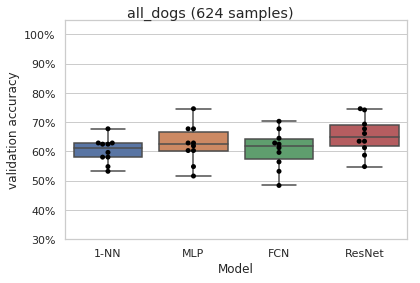

In [6]:
all_data = list()
all_names = list()
results = []

file = '../../logs/2019-05-10T16:36/private_balanced/nearestneighbours_summary.csv'
data = pd.read_csv(file, header=None, names=['val_acc'])
all_data.append(data['val_acc'])
all_names.append('1-NN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-21T14:23/private_balanced/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('MLP')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-05-09T12:30/private_balanced/devnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('FCN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-20T19:47/private_balanced/resnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('ResNet')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

ax = sns.boxplot(data=all_data)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('all_dogs (624 samples)')
plt.xticks([0, 1, 2, 3], [all_names[0], all_names[1], all_names[2], all_names[3]])
format_plot(ax, plt)
ax.set_xlabel('Model')
plt.ylim(bottom=0.30, top=1.05)
plt.savefig('boxplot_alldogs.png', bbox_inches='tight')


# Train on dog0 data only

[['1-NN', 0.6, 0.1476844595361251], ['MLP', 0.6333333373069763, 0.09514986992191721], ['FCN', 0.6333333373069763, 0.10861391091418572], ['ResNet', 0.6277777880430222, 0.09460770067177357]]


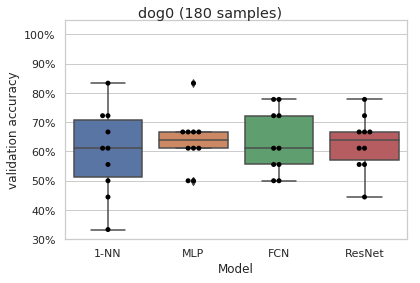

In [7]:
all_data = list()
all_names = list()
results = []

file = '../../logs/2019-05-10T10:19/private_dog0/nearestneighbours_summary.csv'
data = pd.read_csv(file, header=None, names=['val_acc'])
all_data.append(data['val_acc'])
all_names.append('1-NN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-17T14:56/private_dog0/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('MLP')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-05-10T10:17/private_dog0/devnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('FCN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-18T19:12/private_dog0/resnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('ResNet')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

ax = sns.boxplot(data=all_data)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('dog0 (180 samples)')
plt.xticks([0, 1, 2, 3], all_names)
format_plot(ax, plt)
ax.set_xlabel('Model')
plt.ylim(bottom=0.30, top=1.05)
plt.savefig('boxplot_allModels_dog0.png', bbox_inches='tight')

# Dog accuracy

dog_result   FN  FP   TN   TP  All
dog                               
Furby        42  13   95   68  218
Ozzy         35  12   92   53  192
Sye          45  13   87   69  214
All         122  38  274  190  624
dog_result  Accuracy       TPR       TNR       FPR       FNR
dog                                                         
Furby       0.747706  0.618182  0.879630  0.120370  0.381818
Ozzy        0.755208  0.602273  0.884615  0.115385  0.397727
Sye         0.728972  0.605263  0.870000  0.130000  0.394737
All         0.743590  0.608974  0.878205  0.121795  0.391026


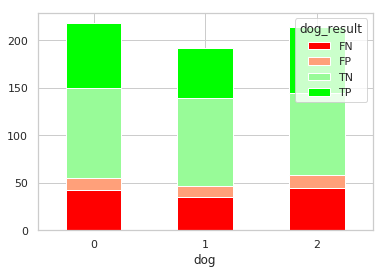

In [8]:
datadir = '../../data/private_data/private_events_dev2' 
fname = 'private_balanced'
meta_train = pd.read_csv(datadir+'/'+fname+'/'+fname+'_TRAIN_meta.txt', sep=',', parse_dates=['date'])
meta_test = pd.read_csv(datadir+'/'+fname+'/'+fname+'_TEST_meta.txt', sep=',', parse_dates=['date'])
meta = pd.concat([meta_train, meta_test])

colors = ['red', 'lightsalmon', 'palegreen', 'lime' ]   
meta.groupby('dog')['dog_result'] \
    .value_counts() \
    .sort_index(ascending=False) \
    .unstack(level=1) \
    .plot.bar(stacked=True, color=colors)

plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.xticks(rotation=0)
plt.savefig('bar_dogAccuracy.png', bbox_inches='tight')

results = meta.pivot_table('run', index='dog', columns='dog_result', aggfunc=len, fill_value=0, margins=True)
print(results)


# Calculate Accuracy and FNR, false negative rate, etc.
P = results.TP+results.FN
N = results.TN+results.FP
results['Accuracy'] = (results.TP+results.TN)/(P+N)
results['TPR'] = results.TP/P
results['FPR'] = results.FP/N
results['TNR'] = results.TN/N
results['FNR'] = results.FN/P
print(results[['Accuracy', 'TPR', 'TNR', 'FPR', 'FNR']])

# MLP : all dogs - dog0 - dog0 correct

[['all_dogs', 0.6248848021030426, 0.06573279448330743], ['dog0', 0.6333333373069763, 0.09514986992191721], ['dog0_correct', 0.8307692289352417, 0.07087698871481754]]


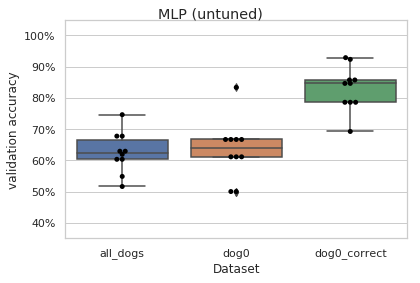

In [9]:
all_data = list()
all_names = list()
results = []

file = '../../logs/2019-03-21T14:23/private_balanced/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('all_dogs')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-17T14:56/private_dog0/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog0')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-17T18:16/private_dog0_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog0_correct')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

ax = sns.boxplot(data=all_data)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('MLP (untuned)')
plt.xticks([0, 1, 2], [all_names[0], all_names[1], all_names[2]])
format_plot(ax, plt)
plt.savefig('boxplot_MLPWang.png', bbox_inches='tight')

# MLP : dog1 and dog2 all vs correct

[['dog0', 0.6333333373069763, 0.09514986992191721], ['dog0_correct', 0.8307692289352417, 0.07087698871481754], ['dog1', 0.6455357164144516, 0.16426036845461672], ['dog1_correct', 0.9099999904632569, 0.09944289499871888], ['dog2', 0.51875, 0.13517606831256945], ['dog2_correct', 0.7464285731315613, 0.0898000996055614]]


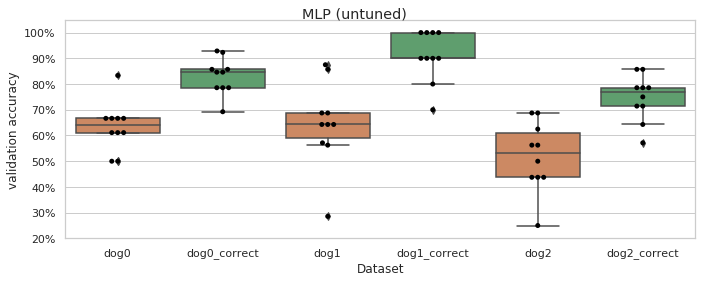

In [10]:
all_data = list()
all_names = list()
results = []
fig=plt.figure(figsize=(10, 4))

file = '../../logs/2019-03-17T14:56/private_dog0/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog0')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-17T18:16/private_dog0_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog0_correct')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-23T08:51/private_dog1/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog1')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-24T09:56/private_dog1_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog1_correct')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-23T22:02/private_dog2/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog2')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-23T19:47/private_dog2_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('dog2_correct')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

clrs = [colorsp1[0], colorsp1[1], colorsp1[0], colorsp1[1], colorsp1[0], colorsp1[1]]
ax = sns.boxplot(data=all_data, palette=clrs)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('MLP (untuned)')
plt.xticks([0, 1, 2, 3, 4, 5], all_names)
format_plot(ax, plt)
plt.ylim(bottom=0.20, top=1.05)
plt.savefig('boxplot_MLPWang_dog012Correct.png', bbox_inches='tight')

# All models : dog0 correct

[['1-NN', 0.7683333333333333, 0.16563570021340565], ['MLP', 0.8307692289352417, 0.07087698871481754], ['FCN', 0.7, 0.16329931050773056], ['ResNet', 0.7549450606107712, 0.16522542090614978]]


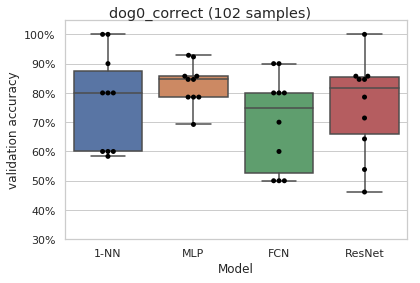

In [11]:
all_data = list()
all_names = list()
results = []

file = '../../logs/2019-05-09T14:07/private_dog0_correct_plus/nearestneighbours_summary.csv'
data = pd.read_csv(file, header=None, names=['val_acc'])
all_data.append(data['val_acc'])
all_names.append('1-NN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-17T18:16/private_dog0_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('MLP')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-05-09T15:15/private_dog0_correct_plus/devnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('FCN')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-03-16T19:35/private_dog0_correct/resnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('ResNet')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

ax = sns.boxplot(data=all_data)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('dog0_correct (102 samples)')
plt.xticks([0, 1, 2, 3], [all_names[0], all_names[1], all_names[2], all_names[3]])
format_plot(ax, plt)
ax.set_xlabel('Model')
plt.ylim(bottom=0.30, top=1.05)
plt.savefig('boxplot_allModels_dog0Correct.png', bbox_inches='tight')

# MLP hyperparameter tuning

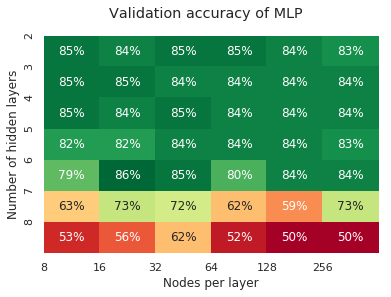

In [12]:
# dog0 correct dataset
# 10-fold cross validation
acc = [  [0.85, 0.84, 0.85, 0.85, 0.84, 0.83],
            [0.85, 0.85, 0.84, 0.84, 0.84, 0.84],
            [0.85, 0.84, 0.85, 0.84, 0.84, 0.84],
            [0.82, 0.82, 0.84, 0.84, 0.84, 0.83],
            [0.79, 0.86, 0.85, 0.8, 0.84, 0.84],
            [0.63, 0.73, 0.72, 0.62, 0.59, 0.73],
            [0.53, 0.56, 0.62, 0.52, 0.5, 0.5]]
ax = sns.heatmap(acc, cmap='RdYlGn', annot=True, fmt = '.0%', cbar=False)
plt.xticks([0, 1, 2, 3, 4, 5], [8, 16, 32, 64, 128, 256], horizontalalignment="center")
plt.yticks([0, 1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel('Nodes per layer')
ax.set_ylabel('Number of hidden layers')
plt.suptitle('Validation accuracy of MLP')
plt.savefig('heatmap_acc_MLP_dog0Correct.png', bbox_inches='tight')

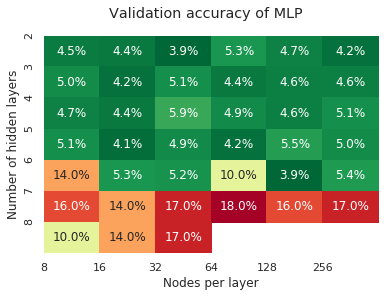

In [13]:
std = [[ 0.045, 0.044, 0.039, 0.053, 0.047, 0.042],
        [0.05, 0.042, 0.051, 0.044, 0.046, 0.046],
        [0.047, 0.044, 0.059, 0.049, 0.046, 0.051],
        [0.051, 0.041, 0.049, 0.042, 0.055, 0.05],
        [0.14, 0.053, 0.052, 0.1, 0.039, 0.054],
        [0.16, 0.14, 0.17, 0.18, 0.16, 0.17],
        [0.1, 0.14, 0.17, np.nan, np.nan, np.nan]]
ax = sns.heatmap(std, cmap='RdYlGn_r', annot=True, fmt = '.1%', cbar=False)
plt.xticks([0, 1, 2, 3, 4, 5], [8, 16, 32, 64, 128, 256], horizontalalignment="center")
plt.yticks([0, 1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel('Nodes per layer')
ax.set_ylabel('Number of hidden layers')
plt.suptitle('Validation accuracy of MLP')
plt.savefig('heatmap_std_MLP_dog0Correct.png', bbox_inches='tight')

[['Wang et al. (2017a)', 0.8307692289352417, 0.07087698871481754], ['tuned (1000/16/16/1)', 0.8455882221460342, 0.04183017082011841]]


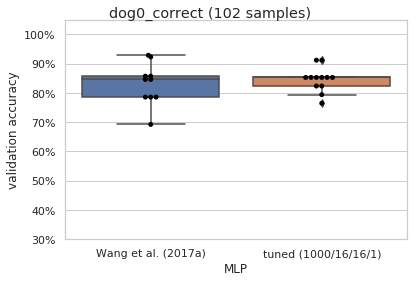

In [14]:
all_data = list()
all_names = list()
results = []

file = '../../logs/2019-03-17T18:16/private_dog0_correct/mlpwang_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('Wang et al. (2017a)') #'1000/500/500/500/2')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

file = '../../logs/2019-05-06T17:01/private_dog0_correct_plus/devnet_summary.csv'
data = pd.read_csv(file, header=None, names=['run','loss','val_acc','epoch','time'])
all_data.append(data['val_acc'])
all_names.append('tuned (1000/16/16/1)')
results.append([all_names[-1], all_data[-1].mean(), all_data[-1].std()])

print(results)

ax = sns.boxplot(data=all_data)
ax = sns.swarmplot(data=all_data, color='black')
plt.suptitle('dog0_correct (102 samples)')
plt.xticks([0, 1], all_names)
format_plot(ax, plt)
ax.set_xlabel('MLP')
plt.ylim(bottom=0.30, top=1.05)
plt.savefig('boxplot_allModels_dog0Correct.png', bbox_inches='tight')